In [1]:
import torch
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import exists

In [2]:
def read_result(read, method, folder_path, I, grad):
    
    tls, tas, vls, vas, test_accs =  [], [], [], [], []
    
    for ith in read:
        tls.append(np.load(folder_path + method + grad + "I" + str(I) + "/tl_" + str(ith)+".npy"))
        tas.append(np.load(folder_path + method + grad + "I" + str(I) + "/ta_" + str(ith)+".npy"))
        vls.append(np.load(folder_path + method + grad + "I" + str(I) + "/vl_" + str(ith)+".npy"))
        vas.append(np.load(folder_path + method + grad + "I" + str(I) + "/va_" + str(ith)+".npy"))
        test_accs.append(torch.load(folder_path + method + grad + "I" + str(I) + "/model_" + str(ith), 
                                    map_location=torch.device('cpu'))["test_acc"])

    #print (torch.load(folder_path + method + grad + "I" + str(I) + "/model_" + str(ith), 
    #                                map_location=torch.device('cpu'))["learning_rate"])
    ts = I*len(tls[0])
    steps = np.arange(I, ts+I, I)
    
    try:
        return np.array(tls), np.array(tas), np.array(vls), np.array(vas), np.array(test_accs), steps
    except:
        test_accs = [test_acc.cpu() for test_acc in test_accs]
        return np.array(tls), np.array(tas), np.array(vls), np.array(vas), np.array(test_accs), steps

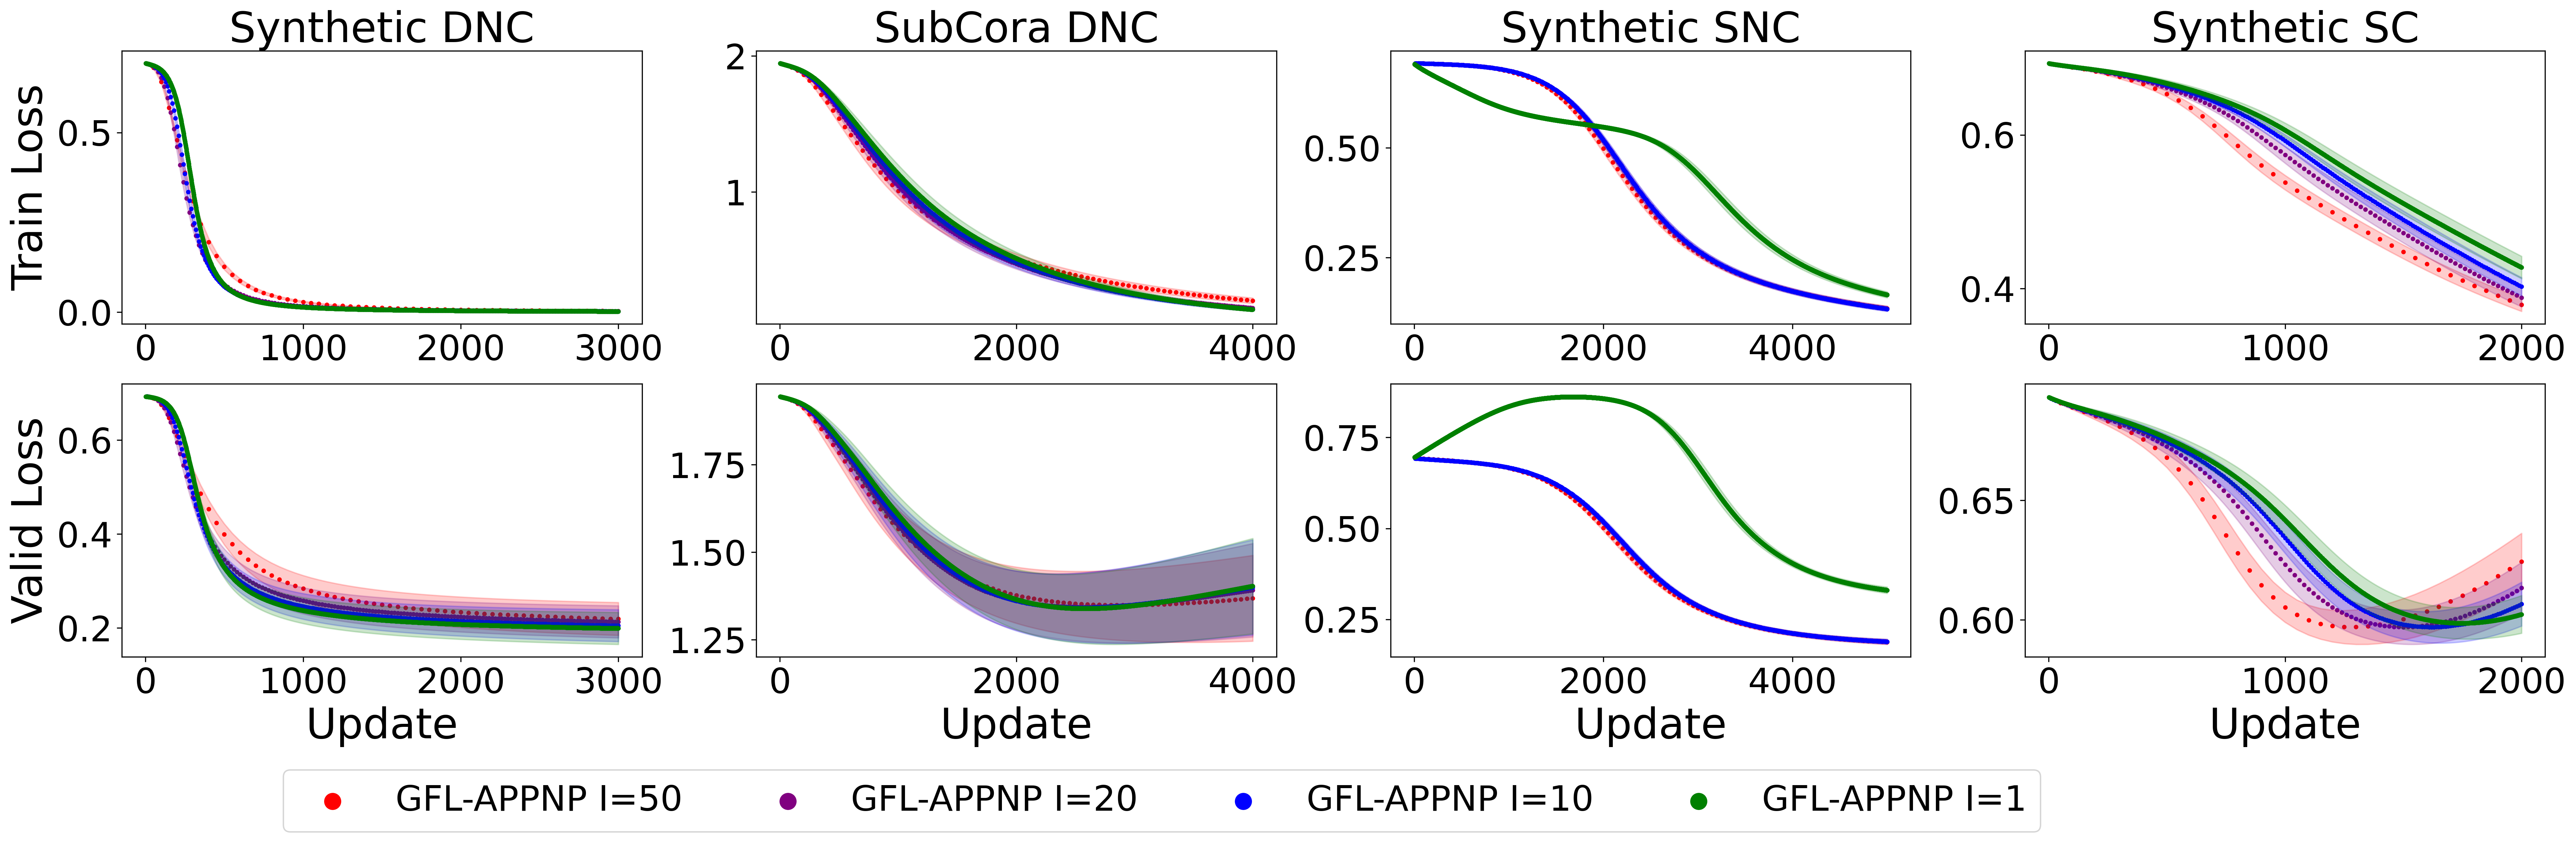

In [327]:
plt.rcParams['xtick.labelsize'] = 25

plt.rcParams['ytick.labelsize'] = 25

fig, ax = plt.subplots(2, 4, figsize=(30, 10), dpi=300)

folders = ["experiments/DNC/0.78phi/result/", 
           "experiments/cora/result/", 
           "experiments/SNC/0.78phi/result/",
           "experiments/GC/"]

method = "GFLAPPNP/"

mdnc = ["50 biased_grad/", "20 biased_grad/", "10 biased_grad/", "1 biased_grad/"]

mcora = ["50 biased_grad/", "20 biased_grad/", "10 biased_grad/", "1 biased_grad/"]

msnc = ["50 biased_grad/", "20 biased_grad/", "10 biased_grad/", "1 biased_grad/"]

mgc = ["50 biased_grad/", "20 biased_grad/", "10 biased_grad/", "1 biased_grad/"]

ms = [mdnc, mcora, msnc, mgc]

exps = np.arange(20)

exp_names = ["synthetic_DNC", "subCora_DNC", "synthetic_SNC", "synthetic_GC"]

color_map = {"50 biased_grad/": "red",
             "10 biased_grad/": "blue",
             "20 biased_grad/": "purple",
             "1 biased_grad/": "green"}

testacc_means = []
names = []
testacc_stds = []

for i in range(len(folders)):
    
    for m in ms[i]:
        
        I, grad = m.split(" ")
        I = int(I)
        if grad == "no_grad/":
            grad_name = "No Compensation"
        elif grad == "biased_grad/":
            grad_name = "Gradient Compensation"
        elif grad == "noisy_grad/":
            grad_name = "Noisy Gradient Compensation"
        tls, tas, vls, vas, test_accs, steps = read_result(exps, method, folders[i], I, grad)
        testacc_means.append(np.mean(test_accs))
        testacc_stds.append(np.std(test_accs))
        names.append(exp_names[i]+grad_name+str(I))
        tls_mean, tls_std = np.mean(tls,axis=0), np.std(tls,axis=0)
        vls_mean, vls_std = np.mean(vls,axis=0), np.std(vls,axis=0)

        c = color_map[m]
        
        ax[0, i].scatter(steps, tls_mean, 
                         label="GFL-APPNP"+" I="+str(I), s=5, color=c)
        ax[0, i].fill_between(steps, tls_mean-1.96*tls_std/np.sqrt(20), tls_mean+1.96*tls_std/np.sqrt(20), 
                           alpha=0.2, color=c)
        
        ax[1, i].scatter(steps, vls_mean,
                         label="GFL-APPNP"+" I="+str(I), s=5, color=c)
        ax[1, i].fill_between(steps, vls_mean-1.96*vls_std/np.sqrt(20), vls_mean+1.96*vls_std/np.sqrt(20), 
                           alpha=0.2, color=c)
        
        
ax[0,0].set_title("Synthetic DNC", fontsize=30)
ax[0,1].set_title("SubCora DNC", fontsize=30)
ax[0,2].set_title("Synthetic SNC", fontsize=30)
ax[0,3].set_title("Synthetic SC", fontsize=30)


ax[1,0].set_xlabel("Update", fontsize=30)
ax[1,1].set_xlabel("Update", fontsize=30)
ax[1,2].set_xlabel("Update", fontsize=30)
ax[1,3].set_xlabel("Update", fontsize=30)


ax[0,0].set_ylabel("Train Loss", fontsize=30)
ax[1,0].set_ylabel("Valid Loss", fontsize=30)


ax[1,0].legend(loc='upper center', bbox_to_anchor=(2, -0.35), ncol=4, fontsize=25, markerscale=5)


plt.subplots_adjust(left  = 0.1,  # the left side of the subplots of the figure
                    right = 0.9,   # the right side of the subplots of the figure
                    bottom = 0.3,   # the bottom of the subplots of the figure
                    top = 0.9,     # the top of the subplots of the figure
                    wspace = 0.22,   # the amount of width reserved for blank space between subplots
                    hspace = 0.22,   # the amount of height reserved for white space between subplots
                   )
plt.savefig("experiments/main_result.jpeg")

In [45]:
folders = ["experiments/DNC/0.78phi/result/", 
           "experiments/cora/result/", 
           "experiments/SNC/0.78phi/result/",
           "experiments/GC/"]

method = "GFLAPPNP/"
mdnc = ["50 biased_grad/", "10 biased_grad/", "20 biased_grad/", "1 biased_grad/",
        "50 no_grad/", "10 no_grad/", "20 no_grad/", "1 no_grad/",
        "50 noisy_grad/", "10 noisy_grad/", "20 noisy_grad/"]



mcora = ["50 biased_grad/", "10 biased_grad/", "20 biased_grad/", "1 biased_grad/",
        "50 no_grad/", "10 no_grad/", "20 no_grad/", "1 no_grad/",
        "50 noisy_grad/", "10 noisy_grad/", "20 noisy_grad/"]


msnc = ["50 biased_grad/", "10 biased_grad/", "20 biased_grad/", "1 biased_grad/",
        "10 noisy_grad/", "20 noisy_grad/"]


mgc = ["50 biased_grad/", "10 biased_grad/", "20 biased_grad/", "1 biased_grad/",
        "50 no_grad/", "10 no_grad/", "20 no_grad/",
        "10 noisy_grad/"]


ms = [mdnc, mcora, msnc, mgc]
exps = np.arange(20)
exp_names = ["synthetic_DNC", "subCora_DNC", "synthetic_SNC", "synthetic_GC"]

testacc_means = []
vnames = []
enames = []
testacc_stds = []

for i in range(len(folders)):
    
    for m in ms[i]:
        
        I, grad = m.split(" ")
        I = int(I)
        if grad == "no_grad/":
            grad_name = "No Compensation"
        elif grad == "biased_grad/":
            grad_name = "Gradient Compensation"
        elif grad == "noisy_grad/":
            grad_name = "Noisy Gradient Compensation"
            
        tls, tas, vls, vas, test_accs, steps = read_result(exps, method, folders[i], I, grad)
        testacc_means.append(np.mean(test_accs))
        testacc_stds.append(np.std(test_accs))
        vnames.append("GFL-APPNP/"+grad_name+"/I="+str(I))
        enames.append(exp_names[i])

In [46]:
df = pd.DataFrame(zip(enames, vnames, testacc_means, testacc_stds))
df

0                                           1         2  \
0   synthetic_DNC        GFL-APPNP/Gradient Compensation/I=50  0.930312   
1   synthetic_DNC        GFL-APPNP/Gradient Compensation/I=10  0.933750   
2   synthetic_DNC        GFL-APPNP/Gradient Compensation/I=20  0.932500   
3   synthetic_DNC         GFL-APPNP/Gradient Compensation/I=1  0.931875   
4   synthetic_DNC              GFL-APPNP/No Compensation/I=50  0.827187   
5   synthetic_DNC              GFL-APPNP/No Compensation/I=10  0.823125   
6   synthetic_DNC              GFL-APPNP/No Compensation/I=20  0.824063   
7   synthetic_DNC               GFL-APPNP/No Compensation/I=1  0.827187   
8   synthetic_DNC  GFL-APPNP/Noisy Gradient Compensation/I=50  0.922500   
9   synthetic_DNC  GFL-APPNP/Noisy Gradient Compensation/I=10  0.930938   
10  synthetic_DNC  GFL-APPNP/Noisy Gradient Compensation/I=20  0.928125   
11    subCora_DNC        GFL-APPNP/Gradient Compensation/I=50  0.539555   
12    subCora_DNC        GFL-APPNP/Gradient Compensation/I=10  0.540672   
13    subCora_DNC        GFL-APPNP/Gradient Compensation/I=20  0.542690   
14    subCora_DNC         GFL-APPNP/Gradient Compensation/I=1  0.542445   
15    subCora_DNC              GFL-APPNP/No Compensation/I=50  0.476180   
16    subCora_DNC              GFL-APPNP/No Compensation/I=10  0.473376   
17    subCora_DNC              GFL-APPNP/No Compensation/I=20  0.474249   
18    subCora_DNC               GFL-APPNP/No Compensation/I=1  0.471330   
19    subCora_DNC  GFL-APPNP/Noisy Gradient Compensation/I=50  0.515874   
20    subCora_DNC  GFL-APPNP/Noisy Gradient Compensation/I=10  0.539568   
21    subCora_DNC  GFL-APPNP/Noisy Gradient Compensation/I=20  0.530362   
22  synthetic_SNC        GFL-APPNP/Gradient Compensation/I=50  0.924633   
23  synthetic_SNC        GFL-APPNP/Gradient Compensation/I=10  0.924102   
24  synthetic_SNC        GFL-APPNP/Gradient Compensation/I=20  0.924703   
25  synthetic_SNC         GFL-APPNP/Gradient Compensation/I=1  0.986875   
26  synthetic_SNC  GFL-APPNP/Noisy Gradient Compensation/I=10  0.991875   
27  synthetic_SNC  GFL-APPNP/Noisy Gradient Compensation/I=20  0.990938   
28   synthetic_GC        GFL-APPNP/Gradient Compensation/I=50  0.701690   
29   synthetic_GC        GFL-APPNP/Gradient Compensation/I=10  0.700680   
30   synthetic_GC        GFL-APPNP/Gradient Compensation/I=20  0.700040   
31   synthetic_GC         GFL-APPNP/Gradient Compensation/I=1  0.700440   
32   synthetic_GC              GFL-APPNP/No Compensation/I=50  0.690340   
33   synthetic_GC              GFL-APPNP/No Compensation/I=10  0.690120   
34   synthetic_GC              GFL-APPNP/No Compensation/I=20  0.689040   
35   synthetic_GC  GFL-APPNP/Noisy Gradient Compensation/I=10  0.686950   

           3  
0   0.021944  
1   0.022483  
2   0.021524  
3   0.021093  
4   0.047487  
5   0.047726  
6   0.040997  
7   0.047774  
8   0.022044  
9   0.019006  
10  0.021333  
11  0.085073  
12  0.084823  
13  0.085168  
14  0.084287  
15  0.090103  
16  0.086953  
17  0.091479  
18  0.085087  
19  0.088802  
20  0.093899  
21  0.082393  
22  0.003866  
23  0.004277  
24  0.003889  
25  0.005896  
26  0.005962  
27  0.005754  
28  0.007470  
29  0.008299  
30  0.006790  
31  0.007297  
32  0.011272  
33  0.010304  
34  0.008487  
35  0.009512

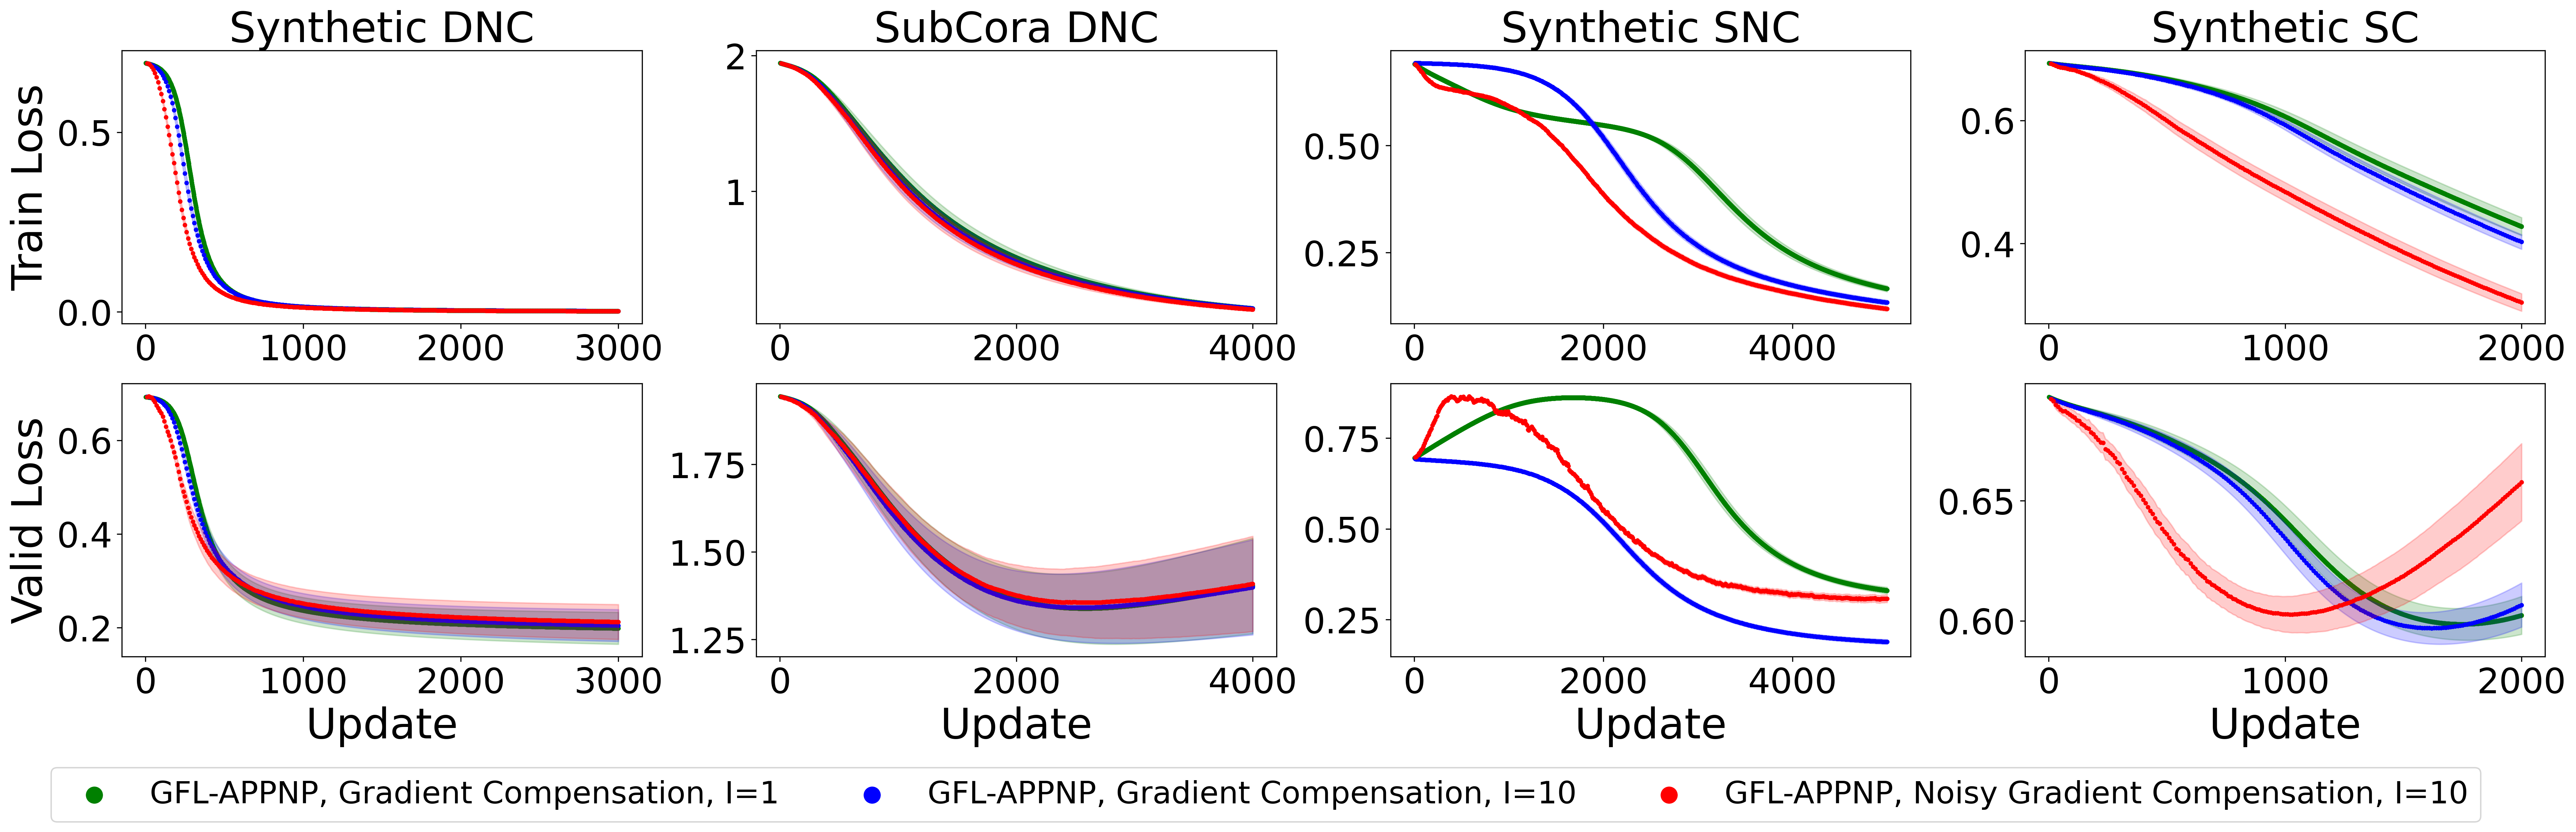

In [336]:
plt.rcParams['xtick.labelsize'] = 25

plt.rcParams['ytick.labelsize'] = 25

fig, ax = plt.subplots(2, 4, figsize=(30, 10), dpi=300)

folders = ["experiments/DNC/0.78phi/result/", 
           "experiments/cora/result/", 
           "experiments/SNC/0.78phi/result/",
           "experiments/GC/"]
method = "GFLAPPNP/"



mdnc = ["1 biased_grad/", "10 biased_grad/",
        "10 noisy_grad/"]



mcora = ["1 biased_grad/", "10 biased_grad/",
         "10 noisy_grad/"]


msnc = ["1 biased_grad/", "10 biased_grad/",
        "10 noisy_grad/"]


mgc = ["1 biased_grad/", "10 biased_grad/",
       "10 noisy_grad/"]



ms = [mdnc, mcora, msnc, mgc]
exps = np.arange(20)
exp_names = ["synthetic_DNC", "subCora_DNC", "synthetic_SNC", "synthetic_GC"]
color_map = {"10 noisy_grad/": "red",
             "10 biased_grad/": "blue",
             "1 biased_grad/": "green"}

testacc_means = []
names = []
testacc_stds = []

for i in range(len(folders)):
    
    for m in ms[i]:
        
        I, grad = m.split(" ")
        I = int(I)
        if grad == "no_grad/":
            grad_name = "No Compensation"
        elif grad == "biased_grad/":
            grad_name = "Gradient Compensation"
        elif grad == "noisy_grad/":
            grad_name = "Noisy Gradient Compensation"
        tls, tas, vls, vas, test_accs, steps = read_result(exps, method, folders[i], I, grad)
        testacc_means.append(np.mean(test_accs))
        testacc_stds.append(np.std(test_accs))
        names.append(exp_names[i]+grad_name+str(I))
        tls_mean, tls_std = np.mean(tls,axis=0), np.std(tls,axis=0)
        vls_mean, vls_std = np.mean(vls,axis=0), np.std(vls,axis=0)
        
        if grad_name != "Gradient Compensation" and folders[i] == "experiments/GC/":
            steps, tls_mean, tls_std = steps[:int(2000/I)], tls_mean[:int(2000/I)], tls_std[:int(2000/I)]
            vls_mean, vls_std = vls_mean[:int(2000/I)], vls_std[:int(2000/I)]

        c = color_map[m]
        ax[0, i].scatter(steps, tls_mean, 
                         label="GFL-APPNP, "+ grad_name + ", I="+str(I), s=5, color=c)
        ax[0, i].fill_between(steps, tls_mean-1.96*tls_std/np.sqrt(20), tls_mean+1.96*tls_std/np.sqrt(20), 
                           alpha=0.2, color=c)
        
        ax[1, i].scatter(steps, vls_mean,
                         label="GFL-APPNP, "+ grad_name + ", I="+str(I), s=5, color=c)
        ax[1, i].fill_between(steps, vls_mean-1.96*vls_std/np.sqrt(20), vls_mean+1.96*vls_std/np.sqrt(20), 
                           alpha=0.2, color=c)
        
        
ax[0,0].set_title("Synthetic DNC", fontsize=30)
ax[0,1].set_title("SubCora DNC", fontsize=30)
ax[0,2].set_title("Synthetic SNC", fontsize=30)
ax[0,3].set_title("Synthetic SC", fontsize=30)


ax[1,0].set_xlabel("Update", fontsize=30)
ax[1,1].set_xlabel("Update", fontsize=30)
ax[1,2].set_xlabel("Update", fontsize=30)
ax[1,3].set_xlabel("Update", fontsize=30)


ax[0,0].set_ylabel("Train Loss", fontsize=30)
ax[1,0].set_ylabel("Valid Loss", fontsize=30)


ax[1,0].legend(loc='upper center', bbox_to_anchor=(2.2, -0.35), ncol=4, fontsize=22, markerscale=5)


plt.subplots_adjust(left  = 0.1,  # the left side of the subplots of the figure
                    right = 0.9,   # the right side of the subplots of the figure
                    bottom = 0.3,   # the bottom of the subplots of the figure
                    top = 0.9,     # the top of the subplots of the figure
                    wspace = 0.22,   # the amount of width reserved for blank space between subplots
                    hspace = 0.22,   # the amount of height reserved for white space between subplots
                   )
plt.savefig("experiments/noisygradient_result.jpeg")

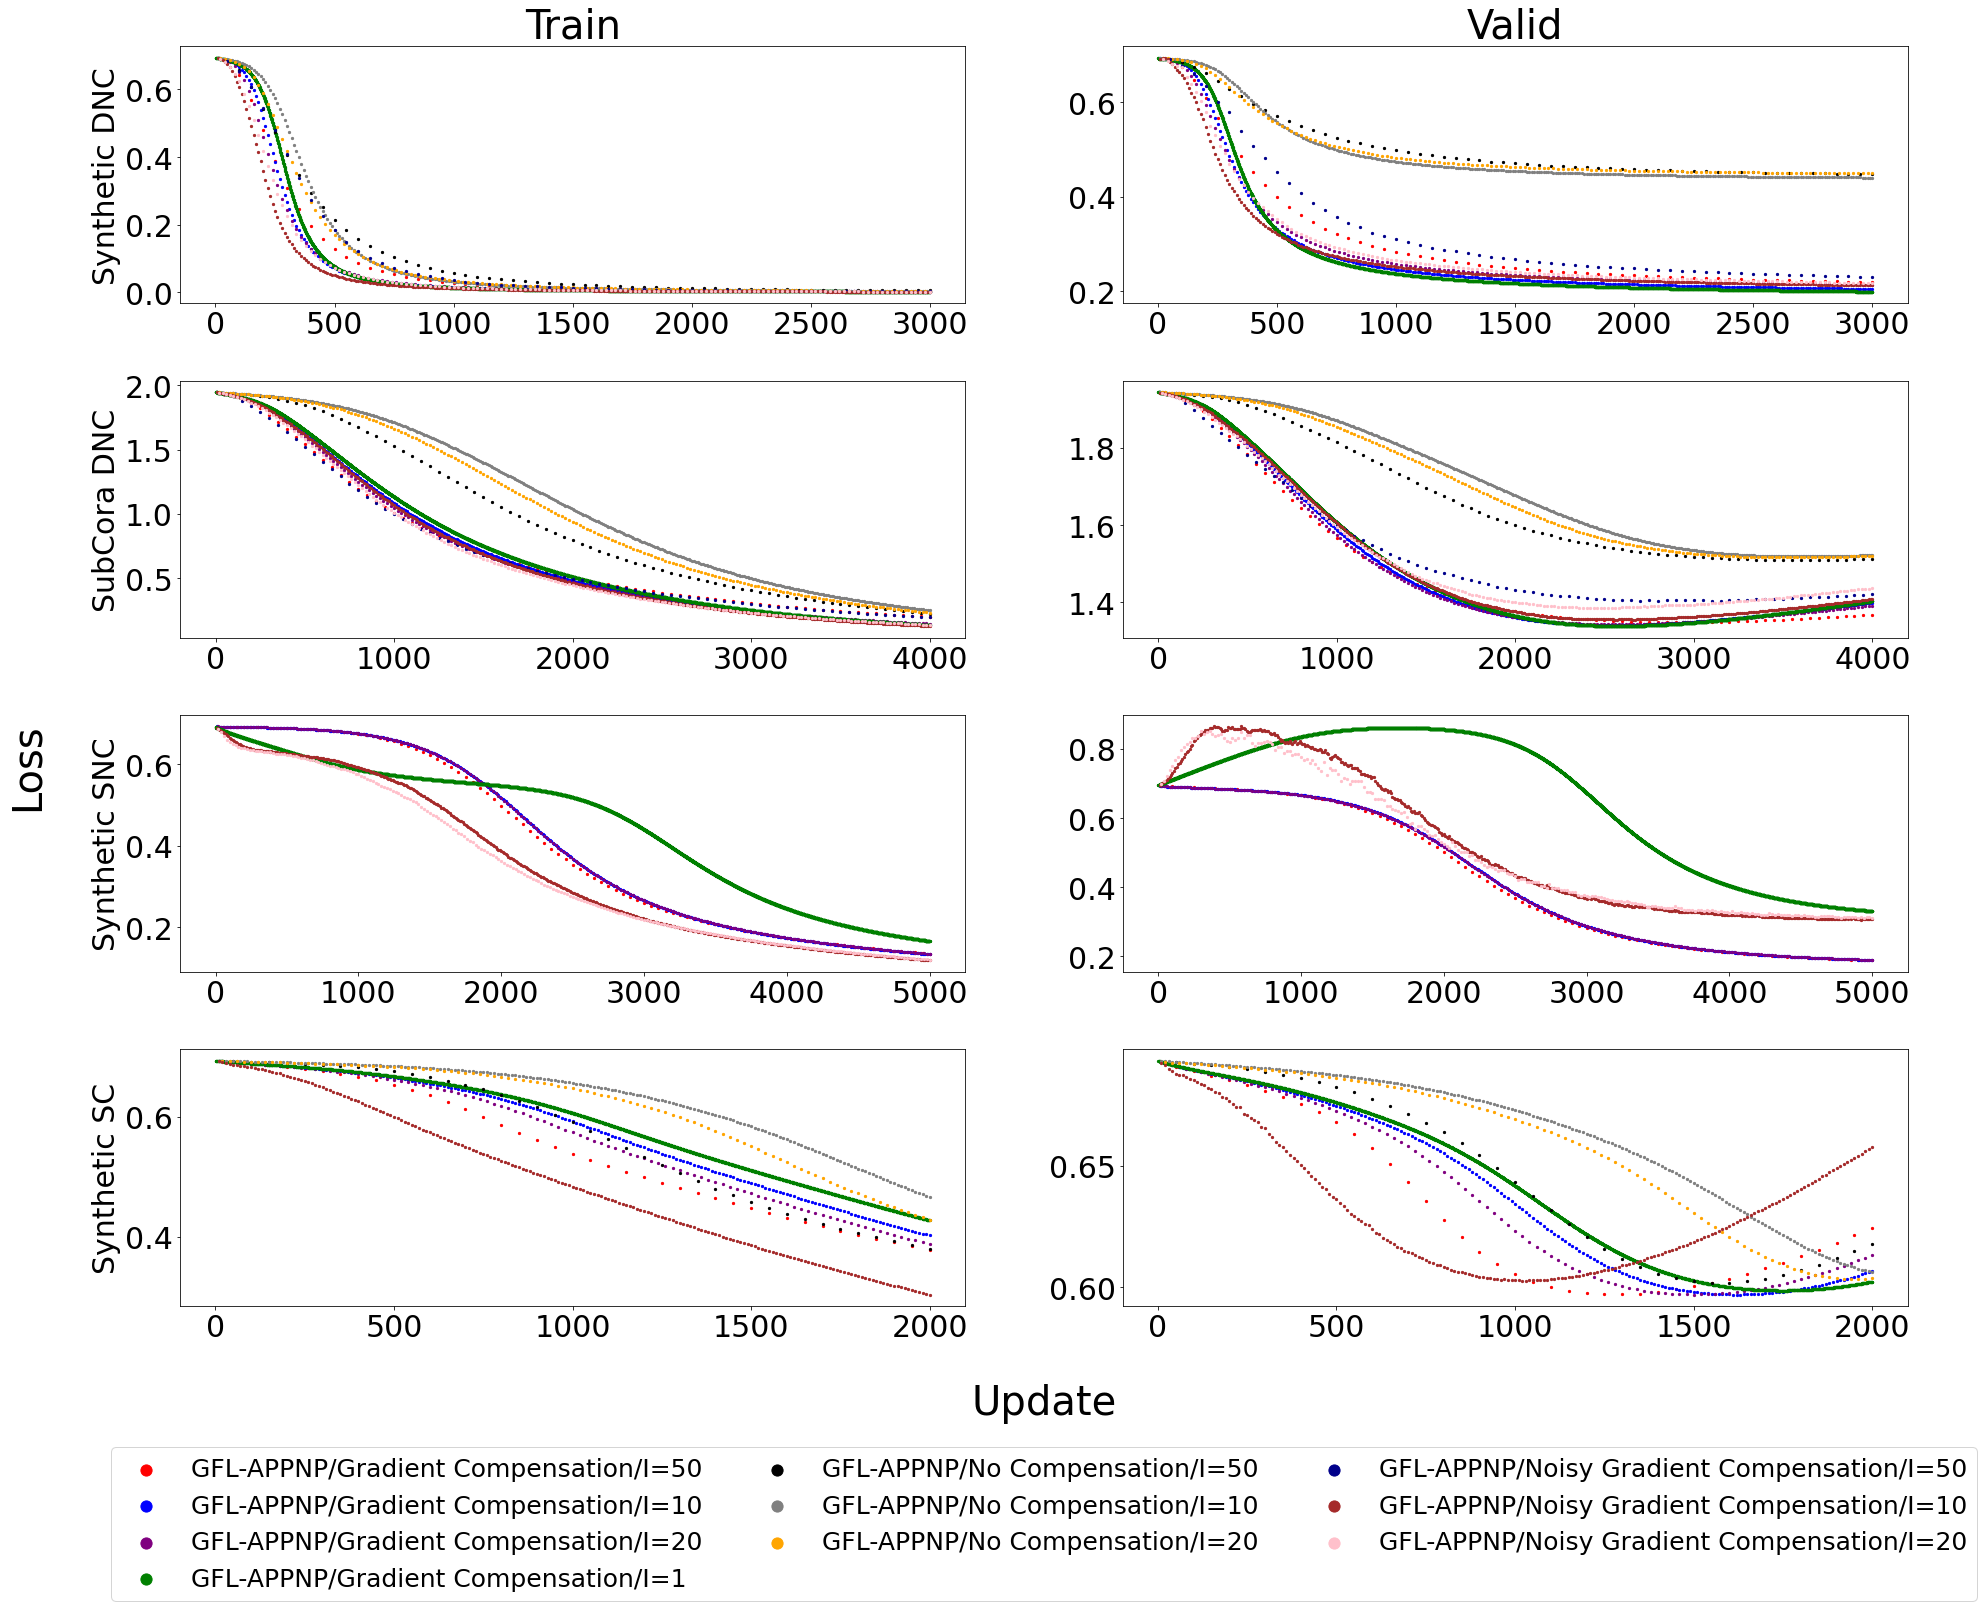

In [225]:
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
fig, ax = plt.subplots(4,2,figsize=(30, 25))
folders = ["experiments/DNC/0.78phi/result/", 
           "experiments/cora/result/", 
           "experiments/SNC/0.78phi/result/",
           "experiments/GC/"]
method = "GFLAPPNP/"



mdnc = ["50 biased_grad/", "10 biased_grad/", "20 biased_grad/", "1 biased_grad/",
        "50 no_grad/", "10 no_grad/", "20 no_grad/",
        "50 noisy_grad/", "10 noisy_grad/", "20 noisy_grad/"]



mcora = ["50 biased_grad/", "10 biased_grad/", "20 biased_grad/", "1 biased_grad/",
        "50 no_grad/", "10 no_grad/", "20 no_grad/",
        "50 noisy_grad/", "10 noisy_grad/", "20 noisy_grad/"]


msnc = ["50 biased_grad/", "10 biased_grad/", "20 biased_grad/", "1 biased_grad/",
        "10 noisy_grad/", "20 noisy_grad/"]


mgc = ["50 biased_grad/", "10 biased_grad/", "20 biased_grad/", "1 biased_grad/",
        "50 no_grad/", "10 no_grad/", "20 no_grad/",
        "10 noisy_grad/"]




ms = [mdnc, mcora, msnc, mgc]
exps = np.arange(20)
exp_names = ["synthetic_DNC", "subCora_DNC", "synthetic_SNC", "synthetic_GC"]

color_map = {"50 biased_grad/": "red",
             "10 biased_grad/": "blue",
             "20 biased_grad/": "purple",
             "1 biased_grad/": "green",
              "50 no_grad/": "black",
             "20 no_grad/": "orange",
             "10 no_grad/": "gray",
              "50 noisy_grad/": "darkblue",
             "20 noisy_grad/": "pink",
             "10 noisy_grad/": "brown"}

testacc_means = []
names = []
testacc_stds = []

for i in range(len(folders)):
    
    for m in ms[i]:
        
        I, grad = m.split(" ")
        I = int(I)
        if grad == "no_grad/":
            grad_name = "No Compensation"
        elif grad == "biased_grad/":
            grad_name = "Gradient Compensation"
        elif grad == "noisy_grad/":
            grad_name = "Noisy Gradient Compensation"
        tls, tas, vls, vas, test_accs, steps = read_result(exps, method, folders[i], I, grad)
        testacc_means.append(np.mean(test_accs))
        testacc_stds.append(np.std(test_accs))
        names.append(exp_names[i]+grad_name+str(I))
        tls_mean, tls_std = np.mean(tls,axis=0), np.std(tls,axis=0)
        vls_mean, vls_std = np.mean(vls,axis=0), np.std(vls,axis=0)

        c = color_map[m]
        
        if grad_name != "Gradient Compensation" and folders[i] == "experiments/GC/":
            steps, tls_mean, tls_std = steps[:int(2000/I)], tls_mean[:int(2000/I)], tls_std[:int(2000/I)]
            vls_mean, vls_std = vls_mean[:int(2000/I)], vls_std[:int(2000/I)]
        
        ax[i, 0].scatter(steps, tls_mean, 
                         label="GFL-APPNP/"+grad_name+"/I="+str(I), s=5, color=c)

        
        ax[i, 1].scatter(steps, vls_mean,
                         label="GFL-APPNP/"+grad_name+"/I="+str(i), s=5, color=c)

        
        
ax[0,0].set_ylabel("Synthetic DNC", fontsize=30)
ax[1,0].set_ylabel("SubCora DNC", fontsize=30)
ax[2,0].set_ylabel("Synthetic SNC", fontsize=30)
ax[3,0].set_ylabel("Synthetic SC", fontsize=30)
fig.text(0.5, 0.14, 'Update', ha='center', fontsize=40)
fig.text(0.02, 0.5, 'Loss', va='center', rotation='vertical', fontsize=40)
ax[0,0].set_title("Train", fontsize=40)
ax[0,1].set_title("Valid", fontsize=40)

ax.flatten()[-6].legend(loc='upper center', bbox_to_anchor=(1.1, -3.1), ncol=3, fontsize=25, markerscale=5)


plt.subplots_adjust(left  = 0.1,  # the left side of the subplots of the figure
                    right = 0.9,   # the right side of the subplots of the figure
                    bottom = 0.2,   # the bottom of the subplots of the figure
                    top = 0.9,     # the top of the subplots of the figure
                    wspace = 0.2,   # the amount of width reserved for blank space between subplots
                    hspace = 0.3,   # the amount of height reserved for white space between subplots
                   )
plt.savefig("experiments/all_result.jpeg")

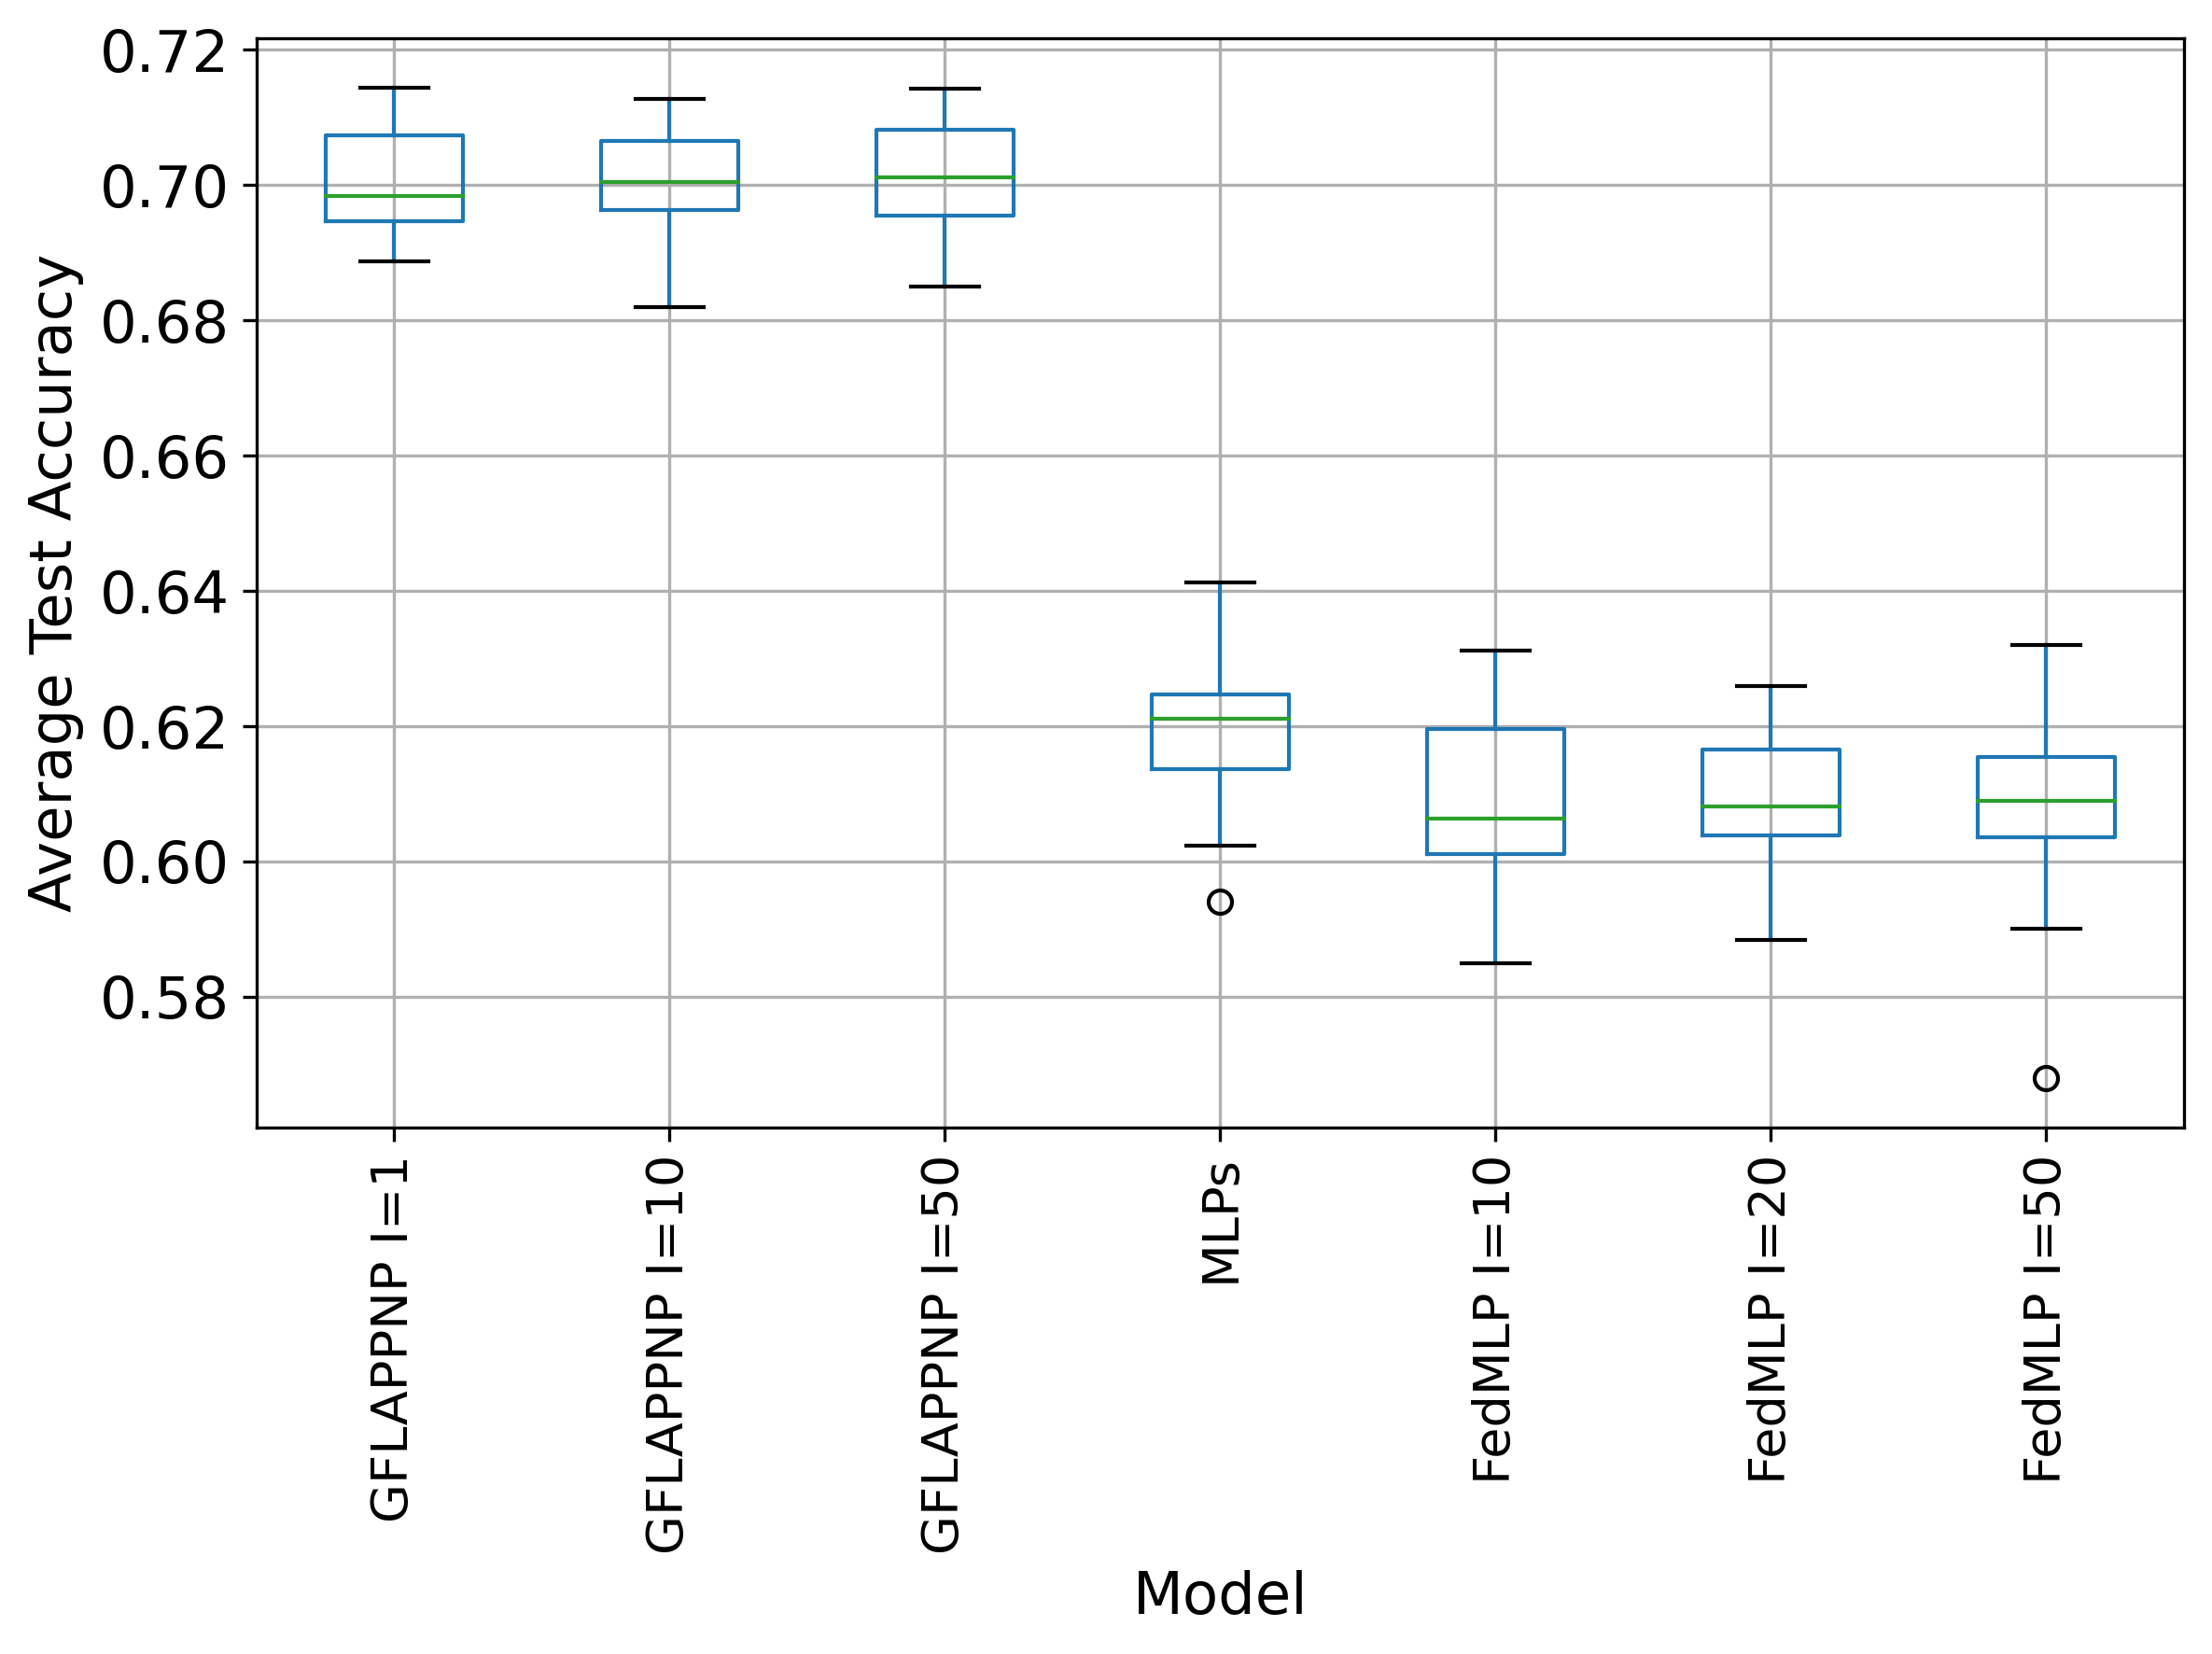

In [337]:
folders = ["experiments/GC/"]

method = "GFLAPPNP/"

mgc = ["50 biased_grad/", "10 biased_grad/", "1 biased_grad/"]


ms = [mgc]
exps = np.arange(20)
exp_names = ["synthetic_GC"]

testaccs_GFLAPPNP = {}
testaccs_MLPs = []
testaccs_FedMLP = {}


for i in range(len(folders)):
    
    for m in ms[i]:
        
        I, grad = m.split(" ")
        I = int(I)
        if grad == "no_grad/":
            grad_name = "No Compensation"
        elif grad == "biased_grad/":
            grad_name = "Gradient Compensation"
        elif grad == "noisy_grad/":
            grad_name = "Noisy Gradient Compensation"
            
        tls, tas, vls, vas, test_accs, steps = read_result(exps, method, folders[i], I, grad)
        testaccs_GFLAPPNP[I] = test_accs
        
        
folders = ["experiments/GC/"]

method = "GFLAPPNP/"

mgc = ["50 biased_grad/", "10 biased_grad/", "1 biased_grad/"]



for I in [10, 20, 50]:

    test_accs = np.load("experiments/GC/FedMLP/testaccs_fedmlp_I"+str(I)+".npy")
    testaccs_FedMLP[I] = test_accs
    
testaccs_MLPs = np.load("experiments/GC/MLPs/testaccs_mlps.npy")


df_gn = pd.DataFrame(zip(testaccs_GFLAPPNP[1], testaccs_GFLAPPNP[10], testaccs_GFLAPPNP[50],
                 testaccs_MLPs,
                 testaccs_FedMLP[10], testaccs_FedMLP[20], testaccs_FedMLP[50]),
                 columns=["GFLAPPNP I=1", "GFLAPPNP I=10", "GFLAPPNP I=50",
                          "MLPs",
                          "FedMLP I=10", "FedMLP I=20", "FedMLP I=50"])


plt.figure(figsize=(8,6), dpi=300)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 15
df_gn.boxplot()
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["GFLAPPNP I=1", "GFLAPPNP I=10", "GFLAPPNP I=50", 
                                "MLPs", 
                                "FedMLP I=10", "FedMLP I=20", "FedMLP I=50"], rotation="vertical", fontsize=13)
plt.ylabel("Average Test Accuracy", fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.tight_layout()
plt.savefig("experiments/Graph_Necessity.jpeg")

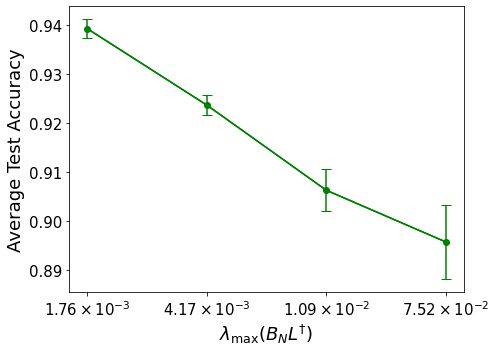

In [149]:
df = pd.read_csv("experiments/connectivity_results.csv")
fig,ax = plt.subplots(1,1, figsize=(7,5))
x = [1,2,3,4]
y = df.iloc[:,1]
yerr = 1.96*df.iloc[:,2]/np.sqrt(20)
plt.errorbar(x, y, yerr, marker="o", markersize=6, capsize=5, color="green")
plt.plot(x, y, color="green")
plt.xticks([1, 2, 3, 4],[r"$1.76\times 10^{-3}$", r"$4.17\times 10^{-3}$", 
                         r"$1.09\times 10^{-2}$", r"$7.52\times 10^{-2}$"], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r"$\lambda_{\max} (B_N L^{\dagger})$", fontsize=18)
plt.ylabel("Average Test Accuracy", fontsize=18)
#plt.title("Effect of Graph Structure", fontsize=15)
plt.tight_layout()
plt.savefig("experiments/connectivity.jpeg")

In [ ]:
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

fig, ax = plt.subplots(1,2,figsize=(30, 20))

folders = ["experiments/SNC/0.78phi/result/",
           "experiments/GC/"]

method = "GFLAPPNP/"


msnc = "50 noisy_grad/"

ms = [msnc]

exps = np.arange(20)
exp_names = ["synthetic_SNC", "synthetic_GC"]
color_map = {"20 noisy_grad/": "red",
             "50 noisy_grad/": "blue"}

testacc_means = []
names = []
testacc_stds = []

for i in range(len(folders)):
    
    for m in ms[i]:
        
        I, grad = m.split(" ")
        I = int(I)
        if grad == "no_grad/":
            grad_name = "No Compensation"
        elif grad == "biased_grad/":
            grad_name = "Gradient Compensation"
        elif grad == "noisy_grad/":
            grad_name = "Noisy Gradient Compensation"
        tls, tas, vls, vas, test_accs, steps = read_result(exps, method, folders[i], I, grad)
        testacc_means.append(np.mean(test_accs))
        testacc_stds.append(np.std(test_accs))
        names.append(exp_names[i]+grad_name+str(I))
        tls_mean, tls_std = np.mean(tls,axis=0), np.std(tls,axis=0)
        vls_mean, vls_std = np.mean(vls,axis=0), np.std(vls,axis=0)

        c = color_map[m]
        
        ax[i, 0].scatter(steps, tls_mean, 
                         label="GFL-APPNP/"+grad_name+"/I="+str(I), s=5, color=c)
        ax[i, 0].fill_between(steps, tls_mean-1.96*tls_std/np.sqrt(20), tls_mean+1.96*tls_std/np.sqrt(20), 
                           alpha=0.2, color=c)
        
        ax[i, 1].scatter(steps, vls_mean,
                         label="GFL-APPNP/"+grad_name+"/I="+str(i), s=5, color=c)
        ax[i, 1].fill_between(steps, vls_mean-1.96*vls_std/np.sqrt(20), vls_mean+1.96*vls_std/np.sqrt(20), 
                           alpha=0.2, color=c)
        
        
ax[0,0].set_title("Train: synthetic, Deterministic Node Classification", fontsize=30)
ax[0,1].set_title("Valid: synthetic, Deterministic Node Classification", fontsize=30)

ax[1,0].set_title("Train: subCora", fontsize=30)
ax[1,1].set_title("Valid: subCora", fontsize=30)

ax[2,0].set_title("Train: synthetic, Stochastic Node Classification", fontsize=30)
ax[2,1].set_title("Valid: synthetic, Stochastic Node Classification", fontsize=30)

ax[3,0].set_title("Train: synthetic, Supervised Classification", fontsize=30)
ax[3,1].set_title("Valid: synthetic, Supervised Classification", fontsize=30)



fig.text(0.5, 0.14, 'Update', ha='center', fontsize=40)
fig.text(0.05, 0.5, 'Loss', va='center', rotation='vertical', fontsize=40)


ax.flatten()[2].legend(loc='upper center', bbox_to_anchor=(1.15, -3.4), ncol=2, fontsize=25, markerscale=5)


plt.subplots_adjust(left  = 0.1,  # the left side of the subplots of the figure
                    right = 0.9,   # the right side of the subplots of the figure
                    bottom = 0.2,   # the bottom of the subplots of the figure
                    top = 0.9,     # the top of the subplots of the figure
                    wspace = 0.25,   # the amount of width reserved for blank space between subplots
                    hspace = 0.4,   # the amount of height reserved for white space between subplots
                   )
plt.savefig("experiments/noisygradient_result.jpeg")